In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read the dataset
df = pd.read_csv('heart.csv', sep=',', header=0)

In [3]:
# See the basic sitatistics of the variables 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# See the basic statistics by the target values
vis = df.copy()
vis0 = vis[vis['target']==0].drop(columns=['target'])
vis1 = vis[vis['target']==1].drop(columns=['target'])
vis0 = vis0.describe(percentiles=[]).drop('50%').round(1)
vis1 = vis1.describe(percentiles=[]).drop('50%').round(1)

In [5]:
vis0.T

,count,mean,std,min,max
age,138.0,56.6,8.0,35.0,77.0
sex,138.0,0.8,0.4,0.0,1.0
cp,138.0,0.5,0.9,0.0,3.0
trestbps,138.0,134.4,18.7,100.0,200.0
chol,138.0,251.1,49.5,131.0,409.0
fbs,138.0,0.2,0.4,0.0,1.0
restecg,138.0,0.4,0.5,0.0,2.0
thalach,138.0,139.1,22.6,71.0,195.0
exang,138.0,0.6,0.5,0.0,1.0
oldpeak,138.0,1.6,1.3,0.0,6.2


In [6]:
vis1.T

,count,mean,std,min,max
age,165.0,52.5,9.6,29.0,76.0
sex,165.0,0.6,0.5,0.0,1.0
cp,165.0,1.4,1.0,0.0,3.0
trestbps,165.0,129.3,16.2,94.0,180.0
chol,165.0,242.2,53.6,126.0,564.0
fbs,165.0,0.1,0.3,0.0,1.0
restecg,165.0,0.6,0.5,0.0,2.0
thalach,165.0,158.5,19.2,96.0,202.0
exang,165.0,0.1,0.3,0.0,1.0
oldpeak,165.0,0.6,0.8,0.0,4.2


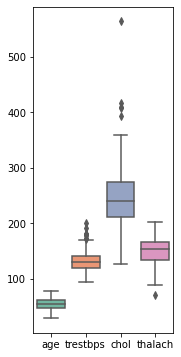

In [7]:
# Check if there are outliers
non_categorical = ['age','trestbps','chol','thalach']
plt.figure(figsize=(2.5,6))
sns.boxplot(data=df[non_categorical],  palette="Set2")
plt.show()

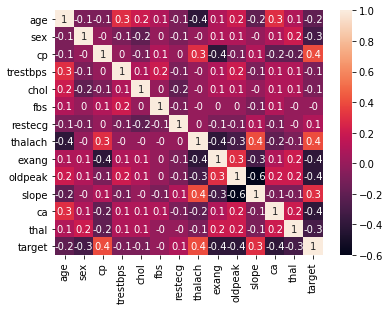

In [8]:
# Check if there are correlations
corrMatrix = df.corr().round(1)
plt.figure(figsize=(6,4.5))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
# Make dummies of categorical variables

cp = pd.get_dummies(df['cp'], prefix = "cp")
restecg = pd.get_dummies(df['restecg'], prefix = "restecg")
slope = pd.get_dummies(df['slope'], prefix = "slope")
ca = pd.get_dummies(df['ca'], prefix = "ca")
thal = pd.get_dummies(df['thal'], prefix = "thal")

# Concatenate the dummies with the original dataset
df = pd.concat([df,cp,restecg,slope,ca,thal],axis=1)

# Drop the original categorical columns
df = df.drop(columns=['cp','restecg','slope','ca','thal'])

In [10]:
# make target and input datasets
x = df.drop(columns=['target'])
y = df['target']

In [11]:
# Normalise the variables in the input dataset
X = (x - np.min(x)) / (np.max(x) - np.min(x)).values

In [12]:
# Split the datasets into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [13]:
# Save the datasets as csv files
x_train.to_csv('x_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
x_test.to_csv('x_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

In [1]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
